In [15]:
import tensorflow as tf

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline
import os
from tensorflow.contrib import slim

In [37]:
baseDir = "/Users/Gautam/Google Drive/Machine Learning/WORKSHOP/imgs/"

fileList = []

for path in os.listdir(baseDir):
    if path != ".DS_Store":
        fileList.append(baseDir + path)
        
# fileList

In [38]:
resizedImages = []

for imageIndex in range(len(fileList)):
    readImage = cv.imread(fileList[imageIndex])
    resizedImages.append(cv.resize(readImage, (64, 64)))

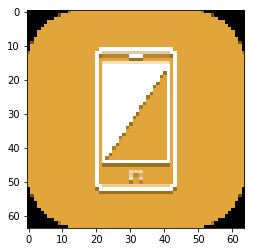

In [39]:
resizedImages = np.array(resizedImages)
plt.imshow(resizedImages[10])
#we should normalize to allow us to use more activation functions

In [55]:
resizedImages.shape
stdImage = np.std(resizedImages, axis = 0)
meanIMage = np.mean(resizedImages, axis = 0)
norm_images = (resizedImages - np.mean(resizedImages, axis = 0)) / np.std(resizedImages, axis = 0)

In [72]:
X = tf.placeholder?

In [74]:
X = tf.placeholder

In [75]:
X = tf.placeholder

In [76]:
X = tf.placeholder(tf.float32, shape = [None, 64, 64, 3])

In [77]:
X_reshape = tf.reshape(X, [-1, 64 * 64 * 3])

In [78]:
X_reshape.shape

TensorShape([Dimension(None), Dimension(12288)])

In [79]:

H1 = slim.linear(X_reshape, 1024, activation_fn=tf.nn.relu)
H2 = slim.linear(H1, 512, activation_fn=tf.nn.relu)

In [80]:
H3 = slim.linear(H1, 256, activation_fn = tf.nn.relu)

In [81]:
Z = slim.linear(H2, 2, activation_fn=tf.nn.sigmoid)
H4 = slim.linear(Z, 256, activation_fn = tf.nn.sigmoid)
H5 = slim.linear(H3, 512, activation_fn = tf.nn.relu)


In [82]:
Xpredicted = slim.linear(H5, 64 * 64 * 3)

In [83]:
featureCost = tf.reduce_sum(tf.square(Xpredicted - X_reshape), 1)
cost = tf.reduce_mean(featureCost)

In [84]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

0 10236.7
1 8007.61
2 7009.89
3 5861.33
4 4895.9
5 4015.7
6 3200.88
7 2487.36
8 1880.67
9 1397.98
10 1027.53
11 752.688
12 547.978
13 398.297
14 289.017
15 216.271
16 153.38
17 114.247
18 83.9444
19 61.8107
20 46.7992
21 35.3049
22 28.5254
23 32.2907
24 37.7505
25 24.0827
26 16.1251
27 15.5541
28 11.9275
29 7.51224
30 5.98378
31 4.48571
32 3.27954
33 2.56088
34 3.34866
35 14.178
36 54.9785
37 23.0374
38 8.70704
39 8.3553
40 4.63498
41 3.32101
42 2.27031
43 1.20534
44 1.13055
45 0.816388
46 1.6111
47 29.3354
48 68.9521
49 39.2474
50 19.6449
51 16.3669
52 8.50953
53 4.95327
54 4.06739
55 2.50927
56 1.62464
57 1.15152
58 0.674537
59 0.51329
60 0.342339
61 0.217125
62 0.143017
63 0.0887717
64 0.0703579
65 0.0389919
66 0.032557
67 0.0198588
68 0.0181087
69 0.0141587
70 0.0401262
71 0.267029
72 2.87751
73 19.2755
74 13.5172
75 5.96972
76 5.85244
77 3.12163
78 2.29681
79 1.62444
80 0.954077
81 0.599143
82 0.482532
83 0.310216
84 0.156931
85 0.211326
86 0.473712
87 3.40311
88 26.2162
89 44.989

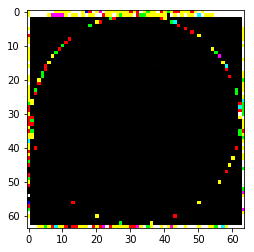

In [86]:
numIterations = 100
batchSize = 25

sess = tf.InteractiveSession()

sess.run(tf.global_variables_initializer())


for iteration in range(numIterations):
    randIndexs = np.random.permutation(range(len(norm_images)))
    numBatches = len(randIndexs) // batchSize
    
    for batch in range(numBatches):
        batchIndex = randIndexs[batch * batchSize: (batch + 1) * batchSize]
        sess.run(optimizer, feed_dict = {X: norm_images})
    training_cost = sess.run(cost, feed_dict = {X: norm_images})
    print(iteration, training_cost)

synthX = sess.run(Xpredicted, feed_dict = {X:norm_images[10].reshape(1,64,64,3)})
synthX = synthX.reshape(64, 64, 3)
plt.imshow(((synthX * stdImage) / meanIMage)  255)
    

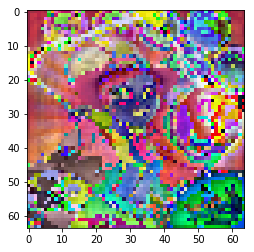

In [122]:
synthX = sess.run(Xpredicted, feed_dict = {X:norm_images[11].reshape(1,64,64,3)})
synthX = synthX.reshape(64, 64, 3)
plt.imshow(((synthX * stdImage) / meanIMage))

1290240

ValueError: Cannot feed value of shape (64, 64, 3) for Tensor 'Placeholder:0', which has shape '(?, 64, 64, 3)'